# Análise do concreto

## Introdução

O concreto é o material mais importante na construção civil. A resistência à compressão do concreto é uma função altamente não linear da idade e dos ingredientes. Esses ingredientes incluem cimento, escória de alto forno, cinzas volantes, água, superplastificante, agregado graúdo e agregado miúdo.

Este material encontra-se dividido em três etapas: 
* 1ª Etapa: Tratamento dos dados;
* 2ª Etapa: Análises dos dados e conclusões;
* 3º Etapa: Clustering;
* 4º Etapa: Modelagem preditiva.

## Objeto de análise:

Na análise de dados deseja entender o comportamento das variáveis com a resistência a compressão do concreto. Além disso, classificação de acordo com o valor de $f_{ck}$. Por fim, como objetivo final a criação de um modelo para prever o valor de resistência à compressão do concreto. A constituição básico do concreto é:

$Concreto = Cimento + H_{2}O + Agregado_{miudo} + Agregado_{graudo}$

O dimensionamento da resistência à compressão do concreto acontece em classes, isto é, [..., 20, 25, 30, ...].

**A dosagem do concreto está relacionado com:**

* $f_{ck}$  do cimento;
* Eficiência da cura;
* Dosagem de água;
* etc...

`Resistência a compressão:` é o principal parâmetro de estruturas de concreto. No dimensionamento do concreto escolhe-se o valor da resistência referente ao cimento, isto é, deseja-se um concreto com $f_{ck} = 25$, então utiliza-se um cimento de resistência 25 e, por fim, dimensiona-se.

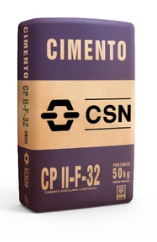




## Objetivos

Os objetivos da análise são:

* Encontrar as variáveis mais correlacionadas;
* Encotrar padrões para os valores da resistência do concreto à compressão;
* Identificar se existe grupos de $f_{ck}$
* Encontrar o melhor modelo preditivo;

## Informações sobre o dataset e limitações

O dataset nos forcene os seguintes dados:

Attribute Information
* Cimento : medido em $kg/m^{3}$
* Escória: medido em $kg/m^{3}$
* Cinza volante : medido em $kg/m^{3}$
* Água : medido em $kg/m^{3}$
* Super plastificante : medido em $kg/m^{3}$
* Agregado graúdo : medido em $kg/m^{3}$
* Agregado miúdo : medido em $kg/m^{3}$
* Idade : medido em dias (1~365)
* Resistência da compressão do concreto: medido em $MPa$


**FONTE E REFERÊNCIAS:**
* https://www.kaggle.com/vinayakshanawad/cement-manufacturing-concrete-dataset
* https://www.kaggle.com/vinayakshanawad/random-forest-with-bootstrap-sampling-for-beginner


**LIMITAÇÕES DA ANÁLISE:**
* O dataset não informa o valor do $f_{ck}$ do cimento utilizado.
* O valor do $f_{ck}$ do cimento é a variável mais importante na hora do dimensionamento do concreto, por isso, provavelmente, os modelos regressivos não serão eficientes.

## Metodologia
* Para as análises e limpezada dos dados foi utilizada a linguagem de programação Python com a interface do Jupyter.

* Para as análises estatísticas foram utilizadas bibliotecas do Python.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

# configurações
import warnings
warnings.filterwarnings('ignore')

# Tratatamento e verificações iniciais

## Importando o dataset

In [2]:
concreto_df = pd.read_csv('dados/concrete.csv')
concreto_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Renomeando o dataset

In [3]:
nomes = {
    'cement':'cimento',
    'slag':'escoria',
    'ash':'cinzas',
    'water':'agua',
    'superplastic':'super_plastificante',
    'coarseagg':'agg_graudo',
    'fineagg':'agg_miudo',
    'age':'idade',
    'strength':'fck'
}

concreto_df.rename(mapper=nomes, axis=1, inplace=True)

## Estatísticas descritivas do dataset

In [4]:
concreto_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cimento,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
escoria,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
cinzas,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
agua,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
super_plastificante,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
agg_graudo,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
agg_miudo,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
idade,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
fck,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Dados nulos, tipos de dados e otimização de memória

In [5]:
concreto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cimento              1030 non-null   float64
 1   escoria              1030 non-null   float64
 2   cinzas               1030 non-null   float64
 3   agua                 1030 non-null   float64
 4   super_plastificante  1030 non-null   float64
 5   agg_graudo           1030 non-null   float64
 6   agg_miudo            1030 non-null   float64
 7   idade                1030 non-null   int64  
 8   fck                  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


* Verifiando os tipos dos dados

In [6]:
concreto_df.isnull().sum().sum()

0

* Otimizando os dados

In [7]:
concreto_df.idade = concreto_df.idade.astype('int16')

* Verificando duplicadas

In [8]:
# filtro bolleano
duplicadas = concreto_df.duplicated()

# aplicando o filtro
concreto_df = concreto_df[~duplicadas]

## Exportando dataset modificado

In [9]:
concreto_df.to_csv('dados/concreto.csv', encoding='utf-8', index=False )

# Análise de dados

In [10]:
concreto_df.sample(3)

,cimento,escoria,cinzas,agua,super_plastificante,agg_graudo,agg_miudo,idade,fck
670,277.1,0.0,97.4,160.6,11.8,973.9,875.6,3,23.14
253,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,56,31.35
800,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,7,26.06


## Analisando a correlação entre as variáveis

In [11]:
def correlacao(data, var1, var2, titulo, xlabel, ylabel):
    plt.figure(figsize=(20, 8))
    sns.scatterplot(x=data[var1], y=data[var2],
                     data=data, color='orange', alpha=0.5)
    plt.grid()
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    

### Existe alguma correlação entre o cimento e a resistência à compressão ?

Na figura abaixo pode-se verificar que o cimento e o $f_{ck}$ têm uma correlação positiva. Contudo, não é uma correlação perfeita.

 **Seria interessante classificar em intervalos a quantidade de cimento**

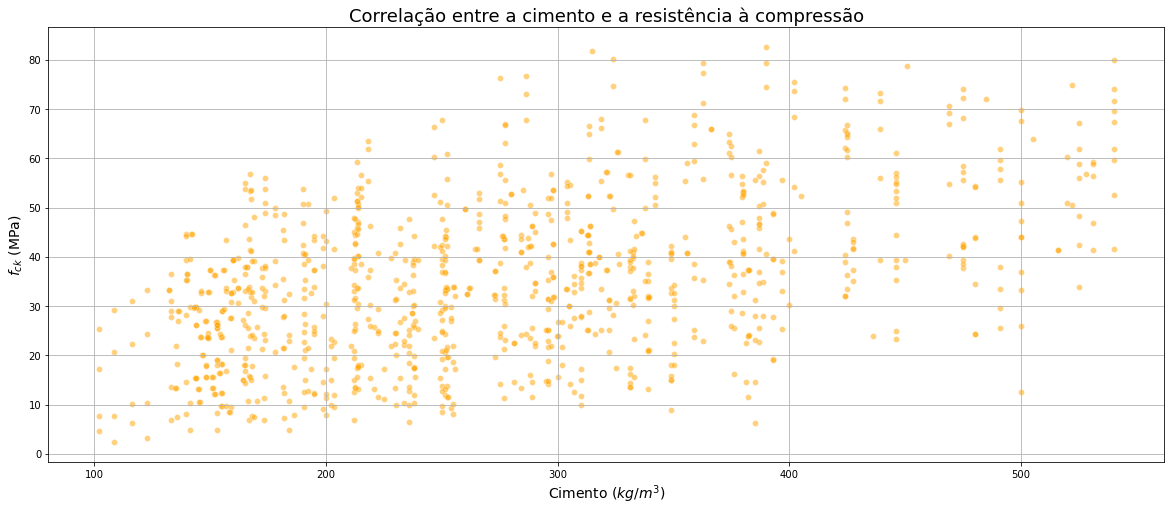

In [12]:
correlacao(concreto_df, 'cimento', 'fck', 'Correlação entre a cimento e a resistência à compressão', 'Cimento ($kg/m^{3}$)', '$f_{ck}$ (MPa)')

### Existe alguma correlação entre a água e a resistência à compressão ?

> Na figura abaixo pode-se verificar que a água e o $f_{ck}$ têm uma correlação fraca.

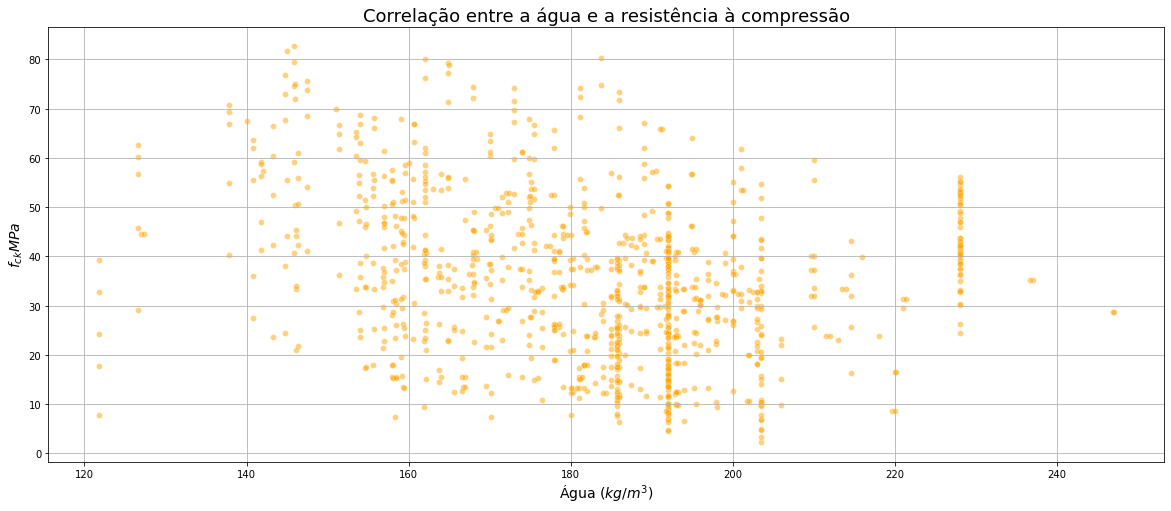

In [13]:
correlacao(concreto_df, 'agua', 'fck', 'Correlação entre a água e a resistência à compressão', 'Água ($kg/m^{3}$)', '$f_{ck} MPa$')

### Existe alguma correlação entre a idade e a resistência à compressão ?

> Na figura abaixo pode-se verificar que a idade e o $f_{ck}$ têm uma correlação fraca. Além disso, vale salientar que as medições de resistência foram realizadas em um intervalo pré-definido [  1,   3,   7,  14,  28,  56,  90,  91, 100, 120, 180, 270, 360,
       365].

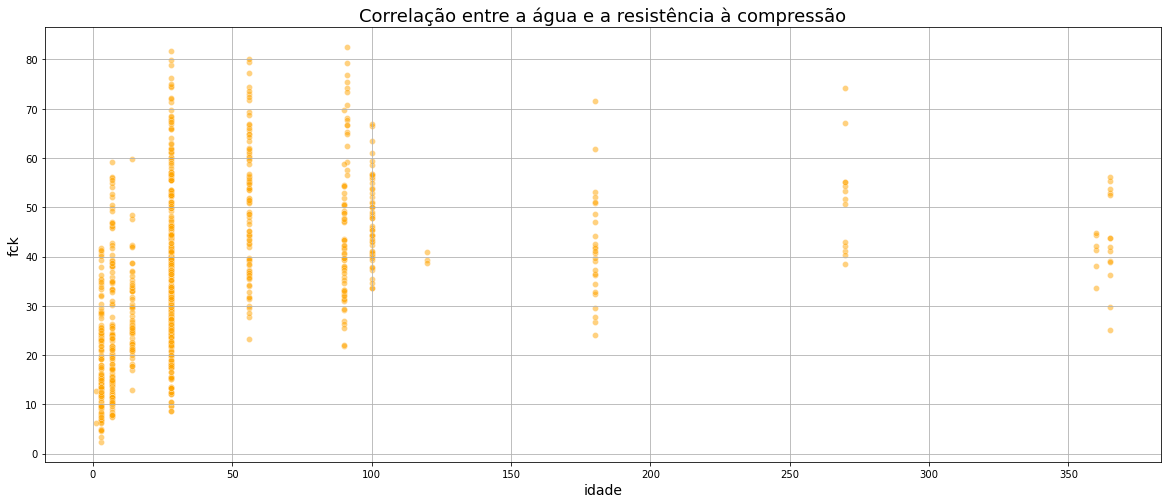

In [14]:
correlacao(concreto_df, 'idade', 'fck', 'Correlação entre a água e a resistência à compressão', 'idade', 'fck')

In [15]:
np.sort(concreto_df.idade.unique())


array([  1,   3,   7,  14,  28,  56,  90,  91, 100, 120, 180, 270, 360,
       365], dtype=int16)

### Verificando a correlação entre escória e fck

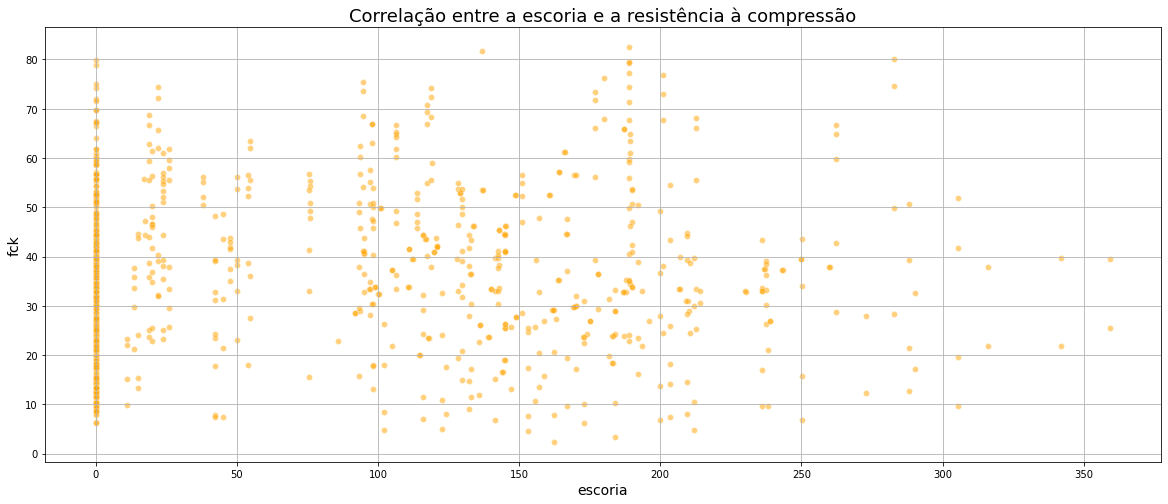

In [16]:
correlacao(concreto_df, 'escoria', 'fck', 'Correlação entre a escoria e a resistência à compressão', 'escoria', 'fck')

### Verificando a correlação entre a cinzas e o fck

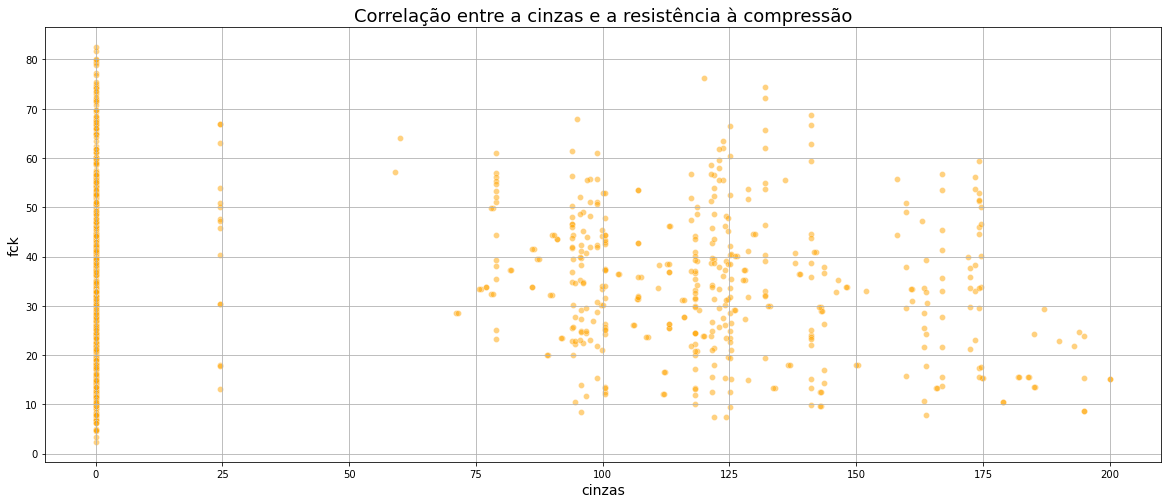

In [17]:
correlacao(concreto_df, 'cinzas', 'fck', 'Correlação entre a cinzas e a resistência à compressão', 'cinzas', 'fck')

### Verificando a correlação de todas as features

In [18]:
concreto_df.corr()

,cimento,escoria,cinzas,agua,super_plastificante,agg_graudo,agg_miudo,idade,fck
cimento,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
escoria,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
cinzas,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
agua,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
super_plastificante,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
agg_graudo,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
agg_miudo,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
idade,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
fck,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


Como foi verificado a variável que tem a maior correlação com o fck é o cimento (comportamento esperado). Por fim, as outras variáveis investigadas não apresentam uma correlação muito forte.

## Análise univariada

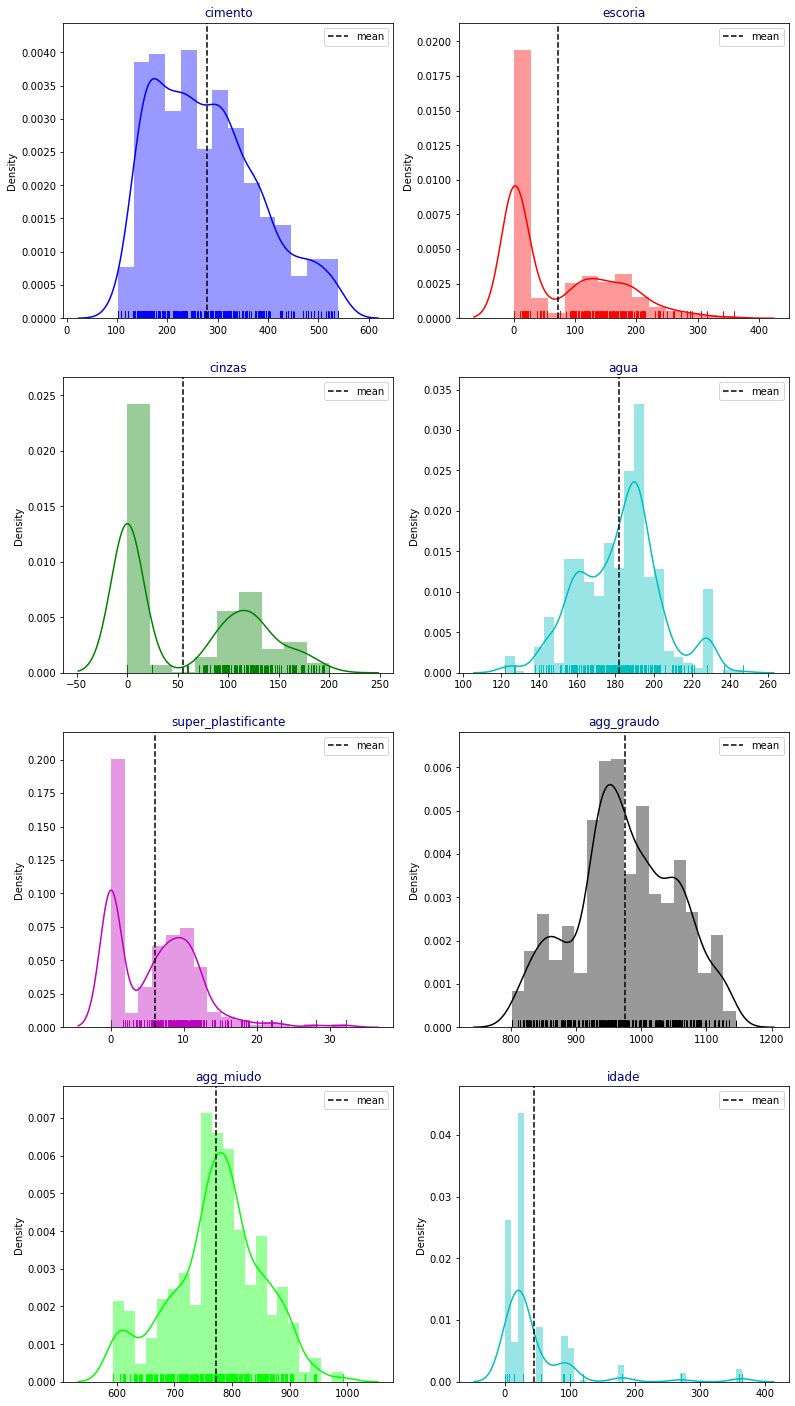

In [21]:
cols = [i for i in concreto_df.columns if i not in 'fck']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(concreto_df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(concreto_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

**FEATURES**
* Cimento - Distribuição assimétrica à direita - o cimento é assimétrico para valores mais altos

* Escória - distribuição assimétrica à direita - a escória é assimétrica para valores mais altos e existem duas gaussianas 

* Cinzas - distribuição assimétrica à direita - as cinzas são assimétricas para valores mais altos e existem duas gaussianas

* Água - Distribuição assimétrica moderadamente à esquerda

* Superplástica - distribuição assimétrica à direita - superplástico é assimétrico para valores mais altos e existem duas gaussianas

* Agregado graúdo - Distribuição assimétrica moderadamente à esquerda

* Agregado miúdo - Distribuição assimétrica moderadamente à esquerda

* Idade - distribuição assimétrica à direita - a idade é assimétrica para valores mais altos e existem cinco gaussianas



## Verificando outliers

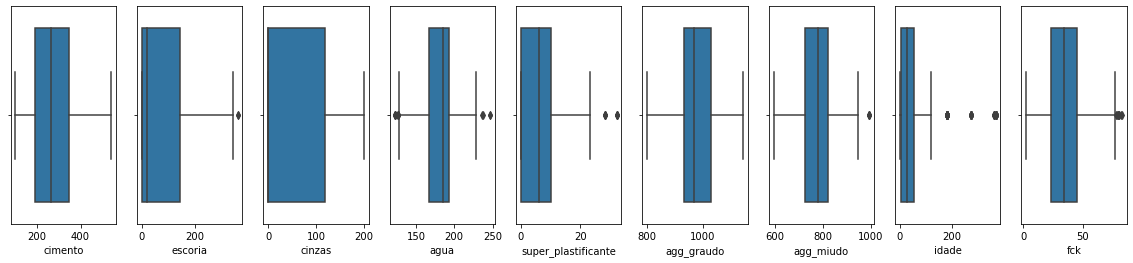

In [22]:
columns = concreto_df.columns
i=1

plt.figure(figsize=(20, 4))
for each in columns:
    df = concreto_df[each]
    plt.subplot(1, len(columns), i)
    sns.boxplot(df)
    i += 1

# Clustering

https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

## Ajustando o dataset

In [23]:
cluster_df = concreto_df.copy()
cluster_df.drop(labels='idade', axis=1, inplace=True)
cluster_df.sample(3)

,cimento,escoria,cinzas,agua,super_plastificante,agg_graudo,agg_miudo,fck
378,154.8,0.0,142.8,193.3,9.1,877.2,867.7,9.74
523,381.4,0.0,0.0,185.7,0.0,1104.6,784.3,14.54
741,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,69.66


## Separando as variável

In [24]:
X = cluster_df

## Métricas de avaliação

## Modelos de clustering

### Modelo Kmeans

In [25]:
from sklearn.cluster import KMeans

# instanciando e treinando o modelo
kmeans = KMeans(n_clusters = 3, random_state=9)
kmeans.fit(X)

# gerando dataframe de visualização
cluster_df['clusters_kmeans'] = kmeans.labels_
cluster_df.groupby('clusters_kmeans')['fck'].mean().to_frame().round(2)

,fck
clusters_kmeans,
0,29.66
1,42.08
2,34.25


<AxesSubplot:xlabel='fck', ylabel='cimento'>

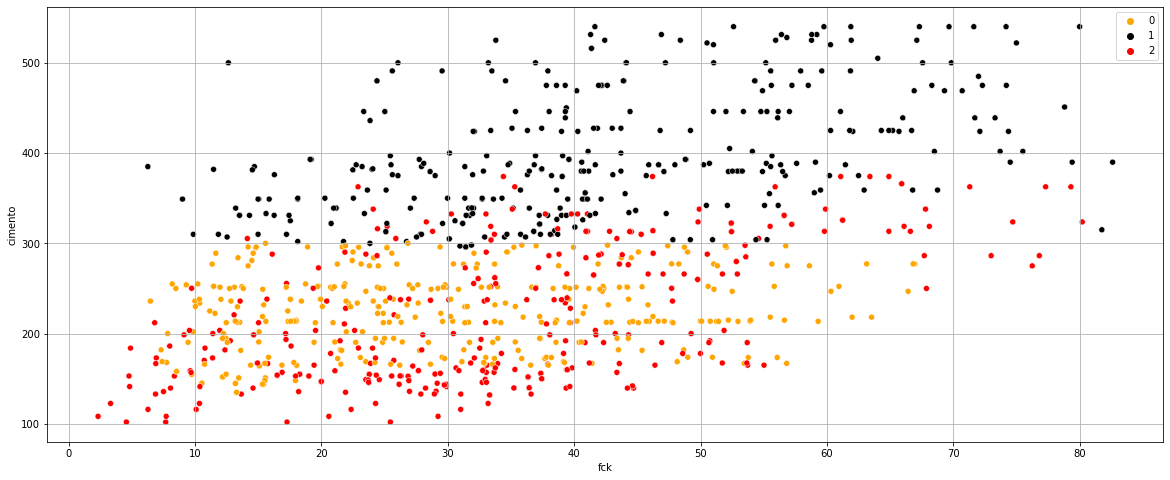

In [26]:
# visualizando graficamente
colors = {
    0:'orange',
    1:'black',
    2:'red',
}

plt.figure(figsize=(20, 8))
plt.grid()
sns.scatterplot(x = 'fck', y = 'cimento', data=cluster_df, hue = kmeans.labels_, palette=colors)

### Modelo AffinityPropagation

In [27]:
%%time
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(damping=0.7)
ap.fit(X)

Wall time: 1.17 s


AffinityPropagation(damping=0.7)

<AxesSubplot:xlabel='fck', ylabel='cimento'>

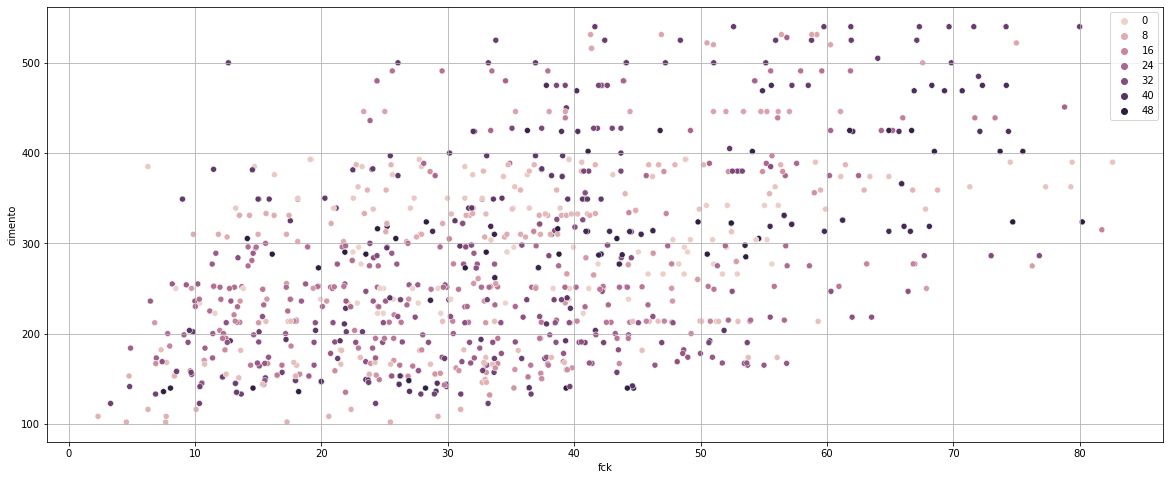

In [28]:
plt.figure(figsize=(20, 8))
plt.grid()
sns.scatterplot(x = 'fck', y = 'cimento', data=cluster_df, hue = ap.labels_)

### Modelo SpectralClustering

In [29]:
%%time
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', eigen_solver='arpack', random_state=30 )

sc.fit(X)

Wall time: 432 ms


SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=3, random_state=30)

<AxesSubplot:xlabel='fck', ylabel='cimento'>

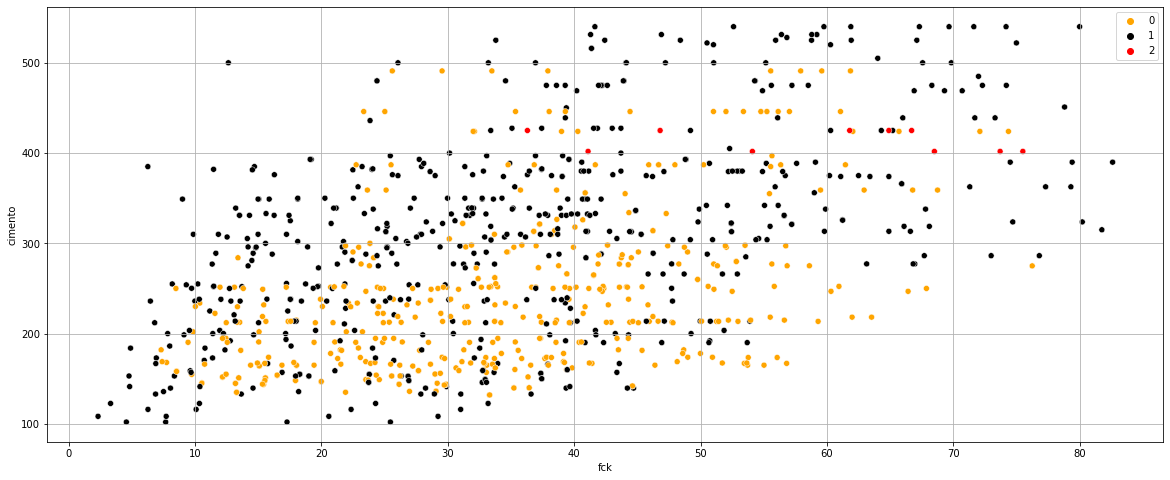

In [30]:
colors = {
    0:'orange',
    1:'black',
    2:'red',
}


plt.figure(figsize=(20, 8))
plt.grid()
sns.scatterplot(x = 'fck', y = 'cimento', data=cluster_df, hue = sc.labels_, palette=colors)

In [31]:
cluster_df['clusters_spectral'] = sc.labels_

In [32]:
cluster_df.groupby('clusters_spectral')['fck'].mean().to_frame().round(2)

,fck
clusters_spectral,
0,34.26
1,35.62
2,58.94


### Modelo AgglomerativeClustering

Wall time: 94.8 ms


<AxesSubplot:xlabel='fck', ylabel='cimento'>

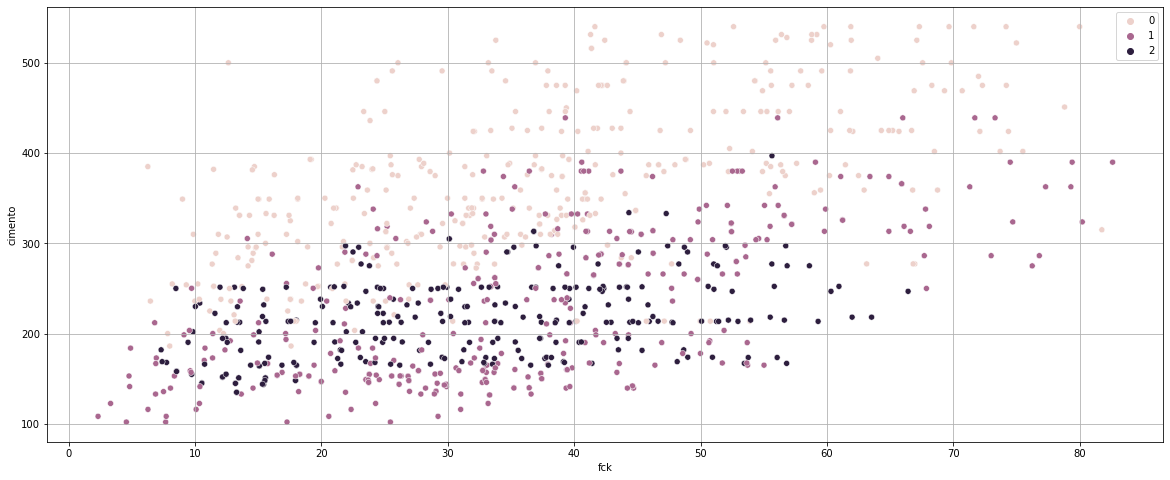

In [33]:
%%time
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=3)

ag.fit(X)

plt.figure(figsize=(20, 8))
plt.grid()
sns.scatterplot(x = 'fck', y = 'cimento', data=cluster_df, hue = ag.labels_)

In [34]:
cluster_df['clusters_agg'] = ag.labels_
cluster_df.groupby('clusters_agg')['fck'].mean().to_frame().round(2)

,fck
clusters_agg,
0,37.08
1,36.21
2,31.32


# Regressão

## Ajustando o dataset

In [35]:
# fazendo uma cópia
predict_df = concreto_df.copy()

## Filtragem e pré-processamento

**FILTRANDO**

In [36]:
# filtrando os outliers
filtro_reg = (predict_df.fck < 50) & (predict_df.agua < 225) 
predict_df = predict_df[filtro_reg]

## Seleção, separação das variáveis e pré-processamento.

**SELÇÃO DAS VARIÁVEIS**
<hr>

**Variável objetivo**

* Variável $y$: $f_{ck}$

<hr>

* Variável $x_1$: Cimento;

* Variável $x_2$: Escoria

* Variável $x_3$: Cinzas

* Variável $x_4$: Plastificante

* Variável $x_{5}$: Agregado graúdo

* Variável $x_{6}$: Agregado miúdo

* Variável $x_{7}$: Idade


<hr>

**SEPARAÇÃO**

In [37]:
X_pred = predict_df.drop(columns='fck', axis=1)
y_pred = predict_df.fck

**PRÉ-PROCESSAMENTO**

In [38]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
X_num = mmscaler.fit_transform(X_pred.select_dtypes(exclude=['object']))

**SEPARAÇÃO EM MODELOS DE TREINO E TESTE**

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score

# Separando as variáves de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_num, y_pred, test_size=0.25, random_state=50)

## Métricas de avaliação para modelos regressivos

As [métricas](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) de avaliação para modelos regressivos são as seguintes:

*  **R2**


$R^{2}(y, \hat{y})= 1 - \frac{\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n}(y_{i} - \bar{y_{i}})^{2}}$

The best possible score is 1.0, lower values are worse.

*  **MAE**

Como o próprio nome sugere, o MAE calcula o erro médio absoluto entre os valores
reais e os previstos. Ela retorna um valor não negativo, que quanto mais próximo de 0 indica que
os valores previstos encontram-se bem próximos dos reais. O cálculo do MAE é realizado com a a seguinte expressão:

$\text{MAE}(y, \hat{y}) = \frac{1}{n_{amostras}} \sum_{i=0}^{n_{amostras}-1} |y_{i} - \hat{y_{i}}|$

* **MSE**

Mais próximo de zero, melhor o modelo.

$\text{MSE}(y, \hat{y}) = \frac{1}{n_{amostras}} \sum_{i=0}^{n_{amostras}-1} (y_{i} - \hat{y_{i}})^{2}$

* **Explained variance**

$explained\_variance (y, \hat{y}) = 1 - \frac{Var(y - \hat{y})}{Var(y)}  $

The best possible score is 1.0, lower values are worse.

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import explained_variance_score


def validar_modelo(y_test, y_pred):
    i = 3
    print('      Métricas')
    print('***'*6)
    print(f' R2 : {round(r2_score(y_test, y_pred), i)}')
    print(f' EVC: {round(explained_variance_score(y_test, y_pred), i)}')
    print('---'*6)
    print(f' MAE: {round(mean_absolute_error(y_test, y_pred), i)}')
    print(f' MSE: {round(mean_squared_error(y_test, y_pred), i)}')
    print('***'*6)

def retorna_valor(y_test, y_pred):
    a = r2_score(y_test, y_pred)
    b = explained_variance_score(y_test, y_pred)
    c = mean_absolute_error(y_test, y_pred)
    d = mean_squared_error(y_test, y_pred)
    return a, b, c, d

## Modelos preditivos

### SVM

In [41]:
%%time
from sklearn.svm import SVR

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print('***'*6)
    print('KERNEL:{}'.format(kernel))
    print('***'*6)
    svc = SVR(kernel=kernel)
    svc.fit(X_train, y_train)
    validar_modelo(y_test, svc.predict(X_test))

******************
KERNEL:linear
******************
      Métricas
******************
 R2 : 0.383
 EVC: 0.393
------------------
 MAE: 7.406
 MSE: 79.827
******************
******************
KERNEL:poly
******************
      Métricas
******************
 R2 : 0.659
 EVC: 0.662
------------------
 MAE: 5.254
 MSE: 44.076
******************
******************
KERNEL:rbf
******************
      Métricas
******************
 R2 : 0.452
 EVC: 0.467
------------------
 MAE: 6.917
 MSE: 70.936
******************
******************
KERNEL:sigmoid
******************
      Métricas
******************
 R2 : 0.12
 EVC: 0.144
------------------
 MAE: 8.813
 MSE: 113.853
******************
Wall time: 110 ms


* Assim, o melhor modelo foi o SVM foi com o kernel = 'linear'

### Linear Regression

In [42]:
%%time
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
validar_modelo(y_test, lr.predict(X_test))

      Métricas
******************
 R2 : 0.493
 EVC: 0.497
------------------
 MAE: 6.651
 MSE: 65.674
******************
Wall time: 21.9 ms


### K-means

In [43]:
%%time
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=15)
kn.fit(X_train, y_train)
validar_modelo(y_test, kn.predict(X_test))

      Métricas
******************
 R2 : 0.532
 EVC: 0.533
------------------
 MAE: 6.357
 MSE: 60.615
******************
Wall time: 11 ms


In [69]:
# gerando lista de testes
fim = 30
n = list(range(1, fim))

# criando listas auxiliares
r2 =  []
evc = []
mae = []
mse = []

for i in n:
    modelo = KNeighborsRegressor(n_neighbors=i)
    modelo.fit(X_train, y_train)
    a, b, c, d = retorna_valor(y_test, modelo.predict(X_test))
    r2.append(a)
    evc.append(b)
    mae.append(c)
    mse.append(d) 

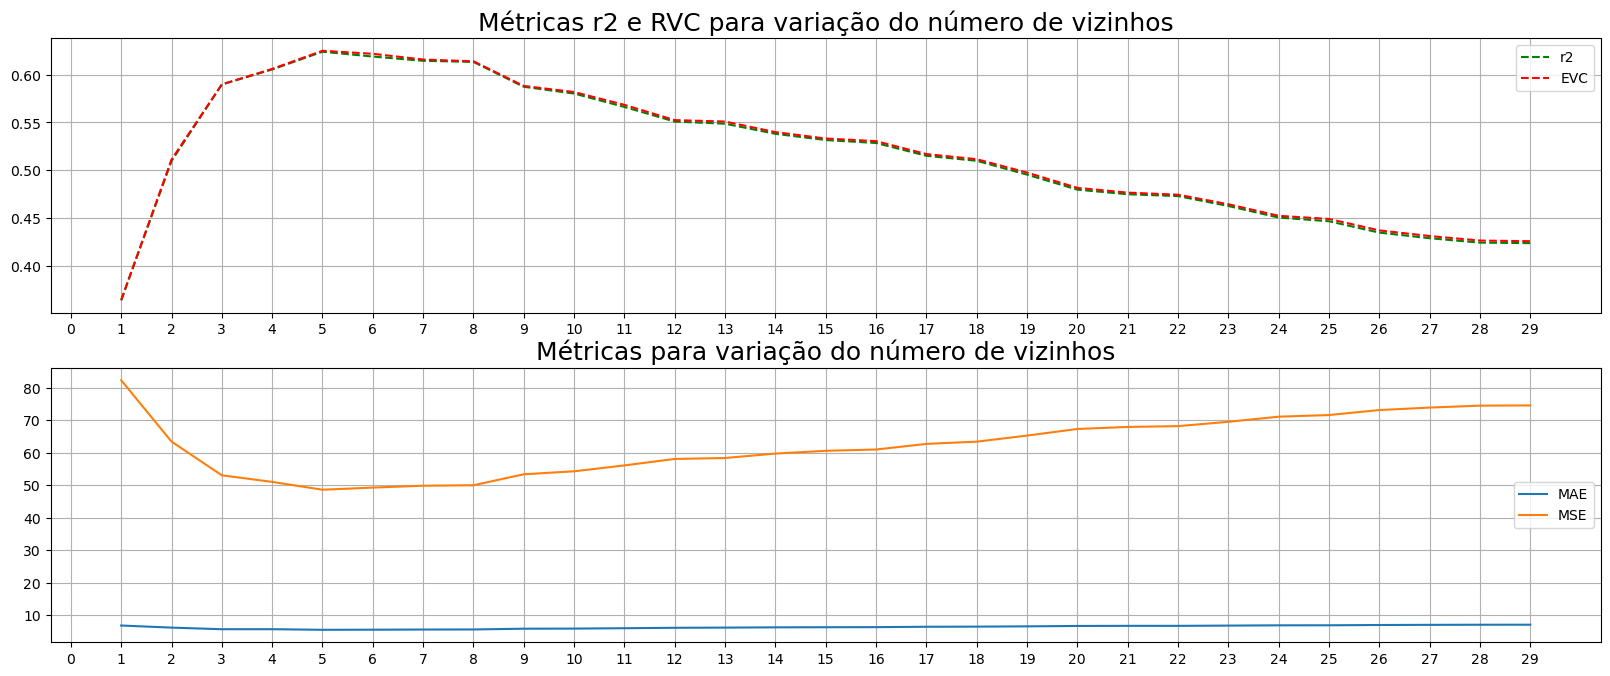

In [70]:
# configurações da figura
plt.figure(figsize=(20, 8), dpi=100)

# primeira figura
plt.subplot(2, 1, 1)
plt.title('Métricas r2 e RVC para variação do número de vizinhos', fontsize=18)
plt.grid()
plt.plot(n, r2, 'g--', n, evc, 'r--')
plt.xticks(ticks=[x for x in range(fim)])
plt.legend(labels=['r2', 'EVC'])

# segunda figura
plt.subplot(2, 1, 2)
plt.title('Métricas para variação do número de vizinhos', fontsize=18)
plt.grid()
plt.plot(n, mae, n, mse)
plt.xticks(ticks=[x for x in range(fim)])
plt.legend(labels=[ 'MAE', 'MSE'])

In [71]:
frame = {
    'R2':r2,
    'EVC':evc,
    'MAE':mae,
    'MSE':mse
        }

tabela = pd.DataFrame(frame)
tabela.head()

In [80]:
export = tabela.to_latex()

### DecisionTree

In [46]:
%%time
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=4, random_state=50)
dt.fit(X_train, y_train)
validar_modelo(y_test, dt.predict(X_test))

      Métricas
******************
 R2 : 0.597
 EVC: 0.609
------------------
 MAE: 5.738
 MSE: 52.181
******************
Wall time: 4.99 ms


In [47]:
# gerando lista de testes
fim = 15
n = list(range(1, fim))

# criando listas auxiliares
r2 =  []
evc = []
mae = []
mse = []

for i in n:
    modelo = DecisionTreeRegressor(max_depth=i, random_state=50)
    modelo.fit(X_train, y_train)
    a, b, c, d = retorna_valor(y_test, modelo.predict(X_test))
    r2.append(a)
    evc.append(b)
    mae.append(c)
    mse.append(d) 

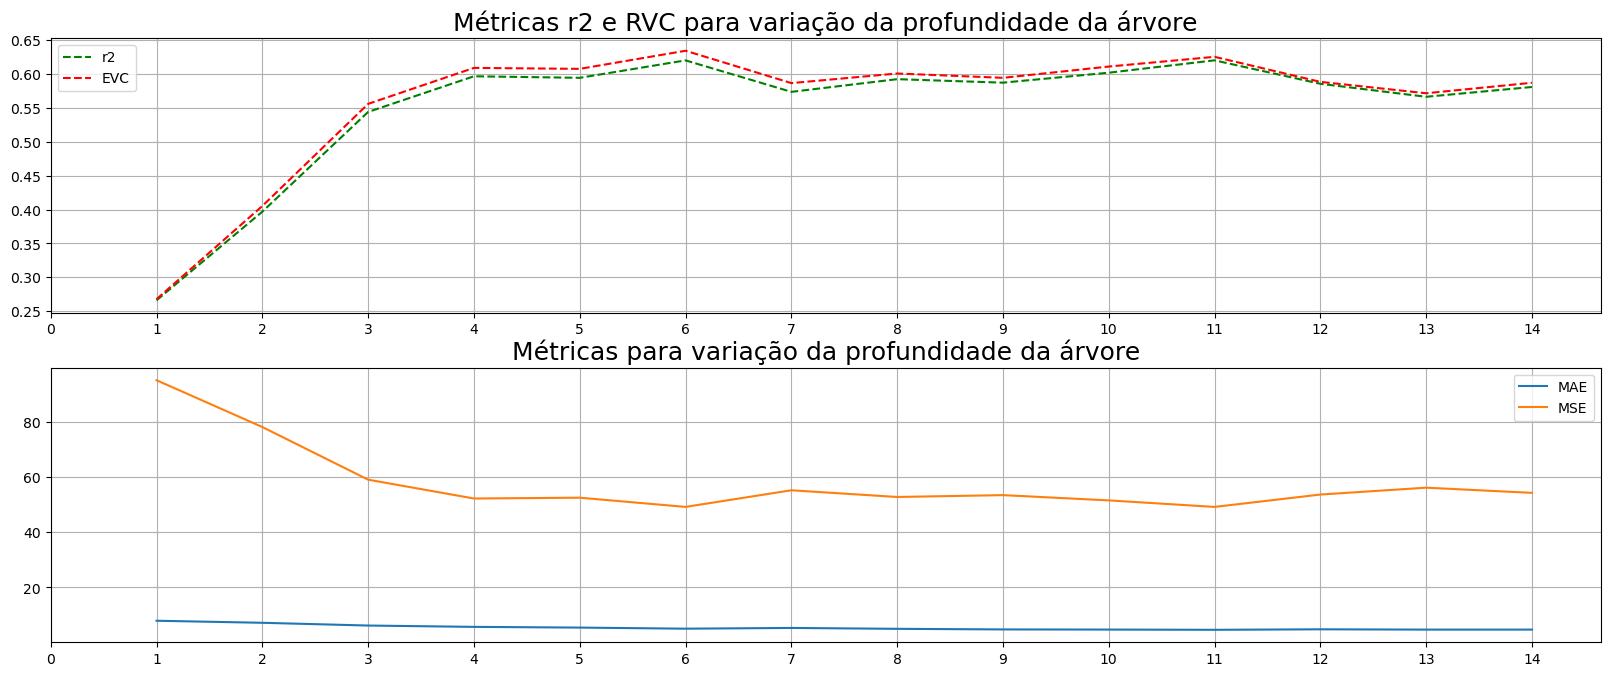

In [48]:
# configurações da figura
plt.figure(figsize=(20, 8), dpi=100)

# primeira figura
plt.subplot(2, 1, 1)
plt.title('Métricas r2 e RVC para variação da profundidade da árvore', fontsize=18)
plt.grid()
plt.plot(n, r2, 'g--', n, evc, 'r--')
plt.xticks(ticks=[x for x in range(fim)])
plt.legend(labels=['r2', 'EVC'])

# segunda figura
plt.subplot(2, 1, 2)
plt.title('Métricas para variação da profundidade da árvore', fontsize=18)
plt.grid()
plt.plot(n, mae, n, mse)
plt.xticks(ticks=[x for x in range(fim)])
plt.legend(labels=[ 'MAE', 'MSE'])

In [ ]:
frame = {
    'R2':r2,
    'EVC':evc,
    'MAE':mae,
    'MSE':mse
        }

tabela = pd.DataFrame(frame)
tabela.head()

### RandomForest

In [49]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=4, n_estimators=200, random_state=50)
rf.fit(X_train, y_train)
validar_modelo(y_test, rf.predict(X_test))

      Métricas
******************
 R2 : 0.715
 EVC: 0.719
------------------
 MAE: 5.003
 MSE: 36.913
******************
Wall time: 407 ms


In [50]:
# gerando lista de testes
fim = 200
n = list(range(1, fim, 50))

# criando listas auxiliares
r2 =  []
evc = []
mae = []
mse = []

for i in n:
    modelo = RandomForestRegressor(n_estimators=i, max_depth=2, random_state=50)
    modelo.fit(X_train, y_train)
    a, b, c, d = retorna_valor(y_test, modelo.predict(X_test))
    r2.append(a)
    evc.append(b)
    mae.append(c)
    mse.append(d) 

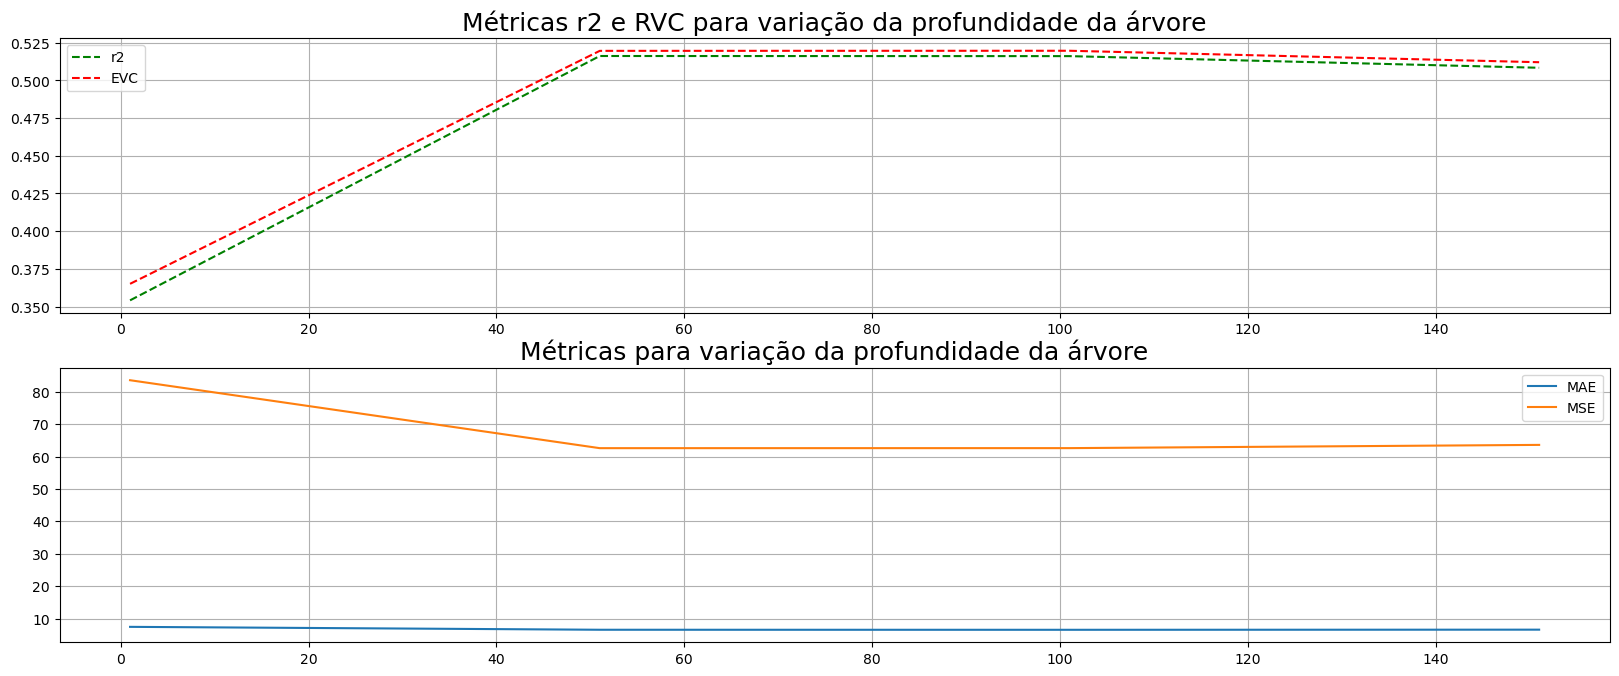

In [51]:
# configurações da figura
plt.figure(figsize=(20, 8), dpi=100)

# primeira figura
plt.subplot(2, 1, 1)
plt.title('Métricas r2 e RVC para variação da profundidade da árvore', fontsize=18)
plt.grid()
plt.plot(n, r2, 'g--', n, evc, 'r--')
plt.legend(labels=['r2', 'EVC'])

# segunda figura
plt.subplot(2, 1, 2)
plt.title('Métricas para variação da profundidade da árvore', fontsize=18)
plt.grid()
plt.plot(n, mae, n, mse)
plt.legend(labels=[ 'MAE', 'MSE'])

In [ ]:
frame = {
    'R2':r2,
    'EVC':evc,
    'MAE':mae,
    'MSE':mse
        }

tabela = pd.DataFrame(frame)
tabela.head()

### AdaBoostRegressor

In [52]:
%%time
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor(n_estimators=50, random_state=50)
ab.fit(X_train, y_train)
validar_modelo(y_test, ab.predict(X_test))

      Métricas
******************
 R2 : 0.72
 EVC: 0.733
------------------
 MAE: 5.024
 MSE: 36.185
******************
Wall time: 109 ms


In [53]:
# gerando lista de testes
fim = 150
n = list(range(1, fim))

# criando listas auxiliares
r2 =  []
evc = []
mae = []
mse = []

for i in n:
    modelo = AdaBoostRegressor(n_estimators=i, random_state=50)
    modelo.fit(X_train, y_train)
    a, b, c, d = retorna_valor(y_test, modelo.predict(X_test))
    r2.append(a)
    evc.append(b)
    mae.append(c)
    mse.append(d) 

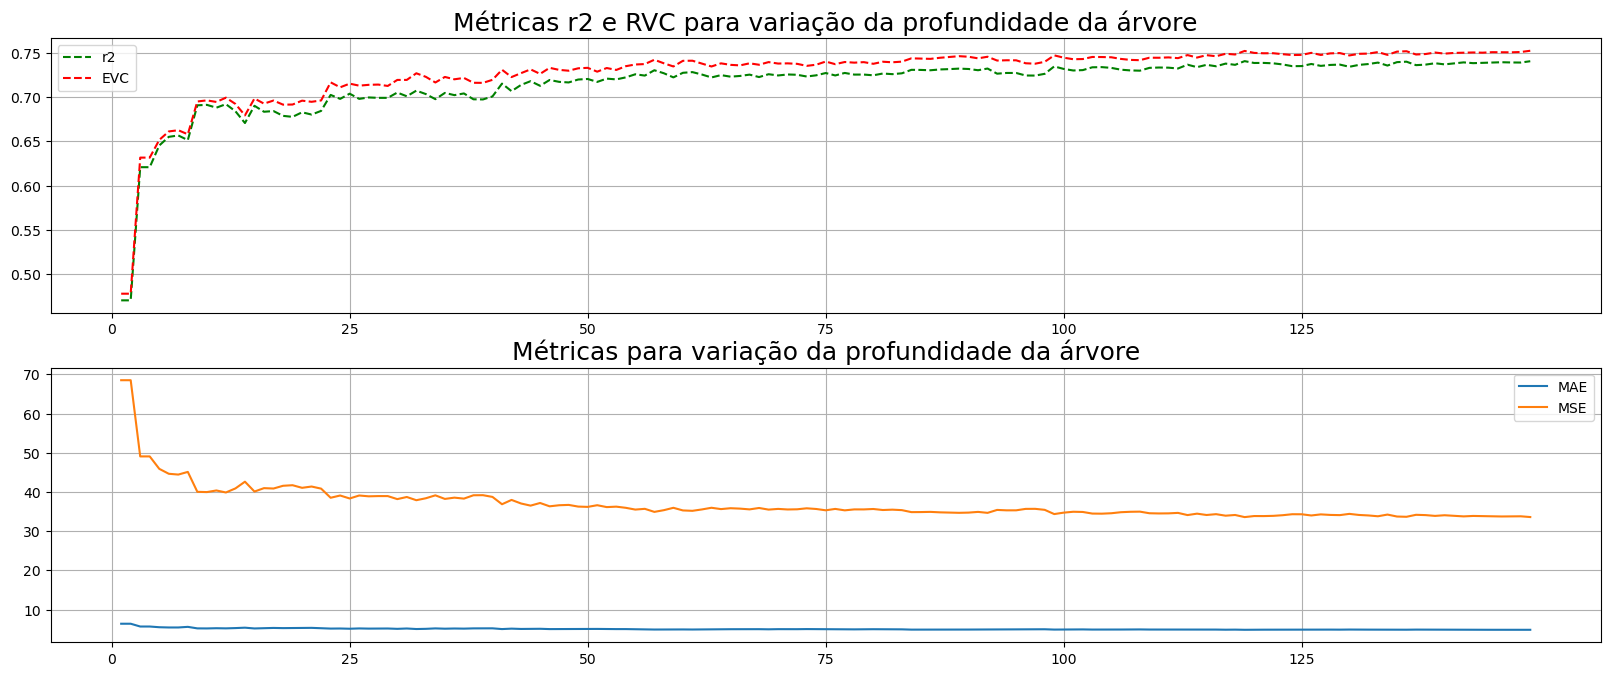

In [54]:
# configurações da figura
plt.figure(figsize=(20, 8), dpi=100)

# primeira figura
plt.subplot(2, 1, 1)
plt.title('Métricas r2 e RVC para variação da profundidade da árvore', fontsize=18)
plt.grid()
plt.plot(n, r2, 'g--', n, evc, 'r--')
plt.xticks(ticks=[x for x in range(0, 150, 25)])
plt.legend(labels=['r2', 'EVC'])

# segunda figura
plt.subplot(2, 1, 2)
plt.title('Métricas para variação da profundidade da árvore', fontsize=18)
plt.grid()
plt.plot(n, mae, n, mse)
plt.xticks(ticks=[x for x in range(0, 150, 25)])
plt.legend(labels=[ 'MAE', 'MSE'])

In [ ]:
frame = {
    'R2':r2,
    'EVC':evc,
    'MAE':mae,
    'MSE':mse
        }

tabela = pd.DataFrame(frame)
tabela.head()

### GradientBoosting

In [55]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=250, loss='ls', max_depth=5, random_state=50)
gb.fit(X_train, y_train)
validar_modelo(y_test, gb.predict(X_test))

      Métricas
******************
 R2 : 0.891
 EVC: 0.895
------------------
 MAE: 2.661
 MSE: 14.108
******************
Wall time: 333 ms


### ExtraTrees

In [82]:
%%time
from sklearn.ensemble import ExtraTreesRegressor

# criando o melhor modelo de acordo com as variações propostas
et = ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=50)
et.fit(X_train, y_train)
validar_modelo(y_test, et.predict(X_test))

      Métricas
******************
 R2 : 0.846
 EVC: 0.848
------------------
 MAE: 3.3
 MSE: 19.962
******************
Wall time: 228 ms


In [83]:
# gerando lista de testes
fim = 25
n = list(range(1, fim))

# criando listas auxiliares
r2 =  []
evc = []
mae = []
mse = []

for i in n:
    modelo = ExtraTreesRegressor(max_depth=i, random_state=50)
    modelo.fit(X_train, y_train)
    a, b, c, d = retorna_valor(y_test, modelo.predict(X_test))
    r2.append(a)
    evc.append(b)
    mae.append(c)
    mse.append(d) 

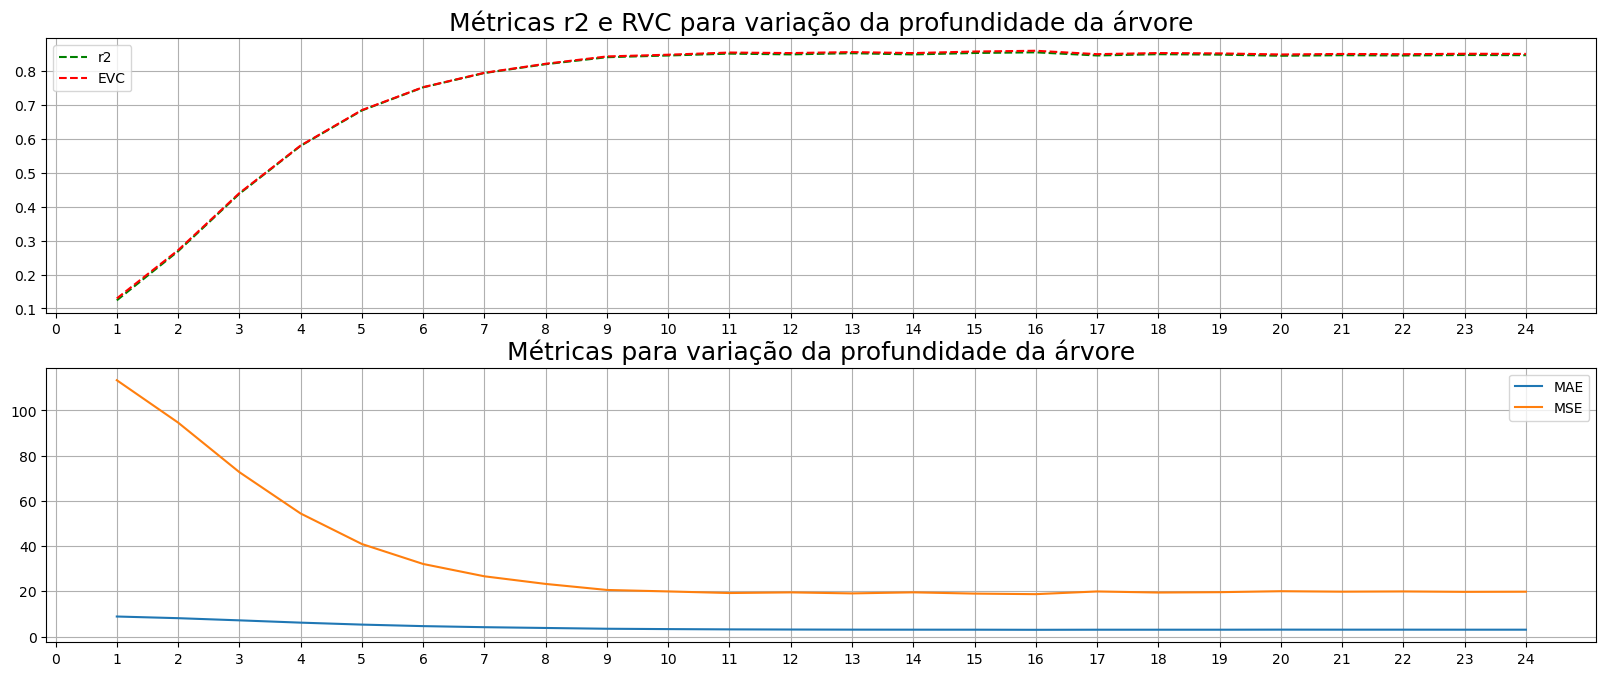

In [84]:
# configurações da figura
plt.figure(figsize=(20, 8), dpi=100)

# primeira figura
plt.subplot(2, 1, 1)
plt.title('Métricas r2 e RVC para variação da profundidade da árvore', fontsize=18)
plt.grid()
plt.plot(n, r2, 'g--', n, evc, 'r--')
plt.xticks(ticks=[x for x in range(fim)])
plt.legend(labels=['r2', 'EVC'])

# segunda figura
plt.subplot(2, 1, 2)
plt.title('Métricas para variação da profundidade da árvore', fontsize=18)
plt.grid()
plt.plot(n, mae, n, mse)
plt.xticks(ticks=[x for x in range(fim)])
plt.legend(labels=[ 'MAE', 'MSE'])

In [85]:
frame = {
    'R2':r2,
    'EVC':evc,
    'MAE':mae,
    'MSE':mse
        }

tabela = pd.DataFrame(frame)
tabela.head()

,R2,EVC,MAE,MSE
0,0.123893,0.129547,8.865762,113.379194
1,0.268605,0.271688,8.132766,94.651733
2,0.438007,0.439965,7.169369,72.728927
3,0.579334,0.580314,6.157692,54.439445
4,0.683712,0.684795,5.289796,40.931675


In [87]:
# gerando lista de testes
fim = 200
n = list(range(1, fim, 25))

# criando listas auxiliares
r2 =  []
evc = []
mae = []
mse = []

for i in n:
    modelo = ExtraTreesRegressor(n_estimators=i, max_depth=6, random_state=50)
    modelo.fit(X_train, y_train)
    a, b, c, d = retorna_valor(y_test, modelo.predict(X_test))
    r2.append(a)
    evc.append(b)
    mae.append(c)
    mse.append(d) 

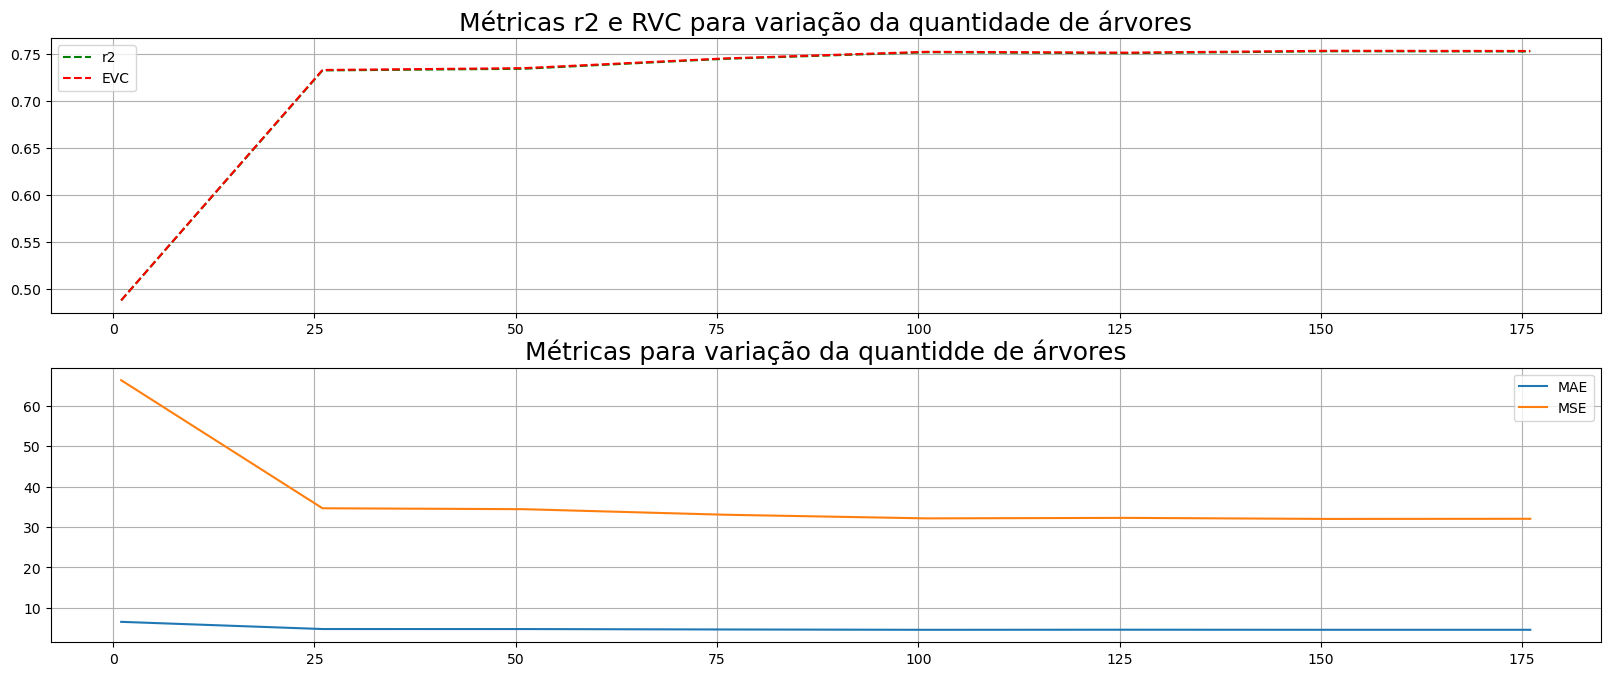

In [88]:
# configurações da figura
plt.figure(figsize=(20, 8), dpi=100)

# primeira figura
plt.subplot(2, 1, 1)
plt.title('Métricas r2 e RVC para variação da quantidade de árvores', fontsize=18)
plt.grid()
plt.plot(n, r2, 'g--', n, evc, 'r--')
plt.legend(labels=['r2', 'EVC'])

# segunda figura
plt.subplot(2, 1, 2)
plt.title('Métricas para variação da quantidde de árvores', fontsize=18)
plt.grid()
plt.plot(n, mae, n, mse)
plt.legend(labels=[ 'MAE', 'MSE'])

In [91]:
frame = {
    'R2':r2,
    'EVC':evc,
    'MAE':mae,
    'MSE':mse
        }

tabela = pd.DataFrame(frame)
tabela.sort_values(by=['R2', 'EVC'], ascending=False)

,R2,EVC,MAE,MSE
6,0.752788,0.753358,4.620235,31.992345
7,0.752532,0.753131,4.621640,32.025396
4,0.751727,0.752237,4.617531,32.129586
5,0.750783,0.751355,4.639608,32.251781
3,0.744790,0.745226,4.695890,33.027399
2,0.734202,0.734894,4.800080,34.397614
1,0.732428,0.732942,4.805982,34.627148
0,0.488116,0.488119,6.583987,66.244147


### Escolha do melhor modelo e criação de um deploy básico

O melhor modelo foi o GradientBoosting com as configurações:

`
GradientBoostingRegressor(n_estimators=250, loss='ls', max_depth=5, random_state=50)
`

**CRIAÇÃO DO MODELO**



In [61]:
model = GradientBoostingRegressor(n_estimators=250, loss='ls', max_depth=5, random_state=50)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=250, random_state=50)

**CRIAÇÃO DE UM ARRAY DE TEST**

In [62]:
deploy_test = predict_df.iloc[650].values.reshape(1, -1)
deploy_test

array([[ 172.4 ,   13.6 ,  172.4 ,  156.8 ,    4.1 , 1006.3 ,  856.4 ,
           3.  ,   21.29]])

In [63]:
arr_test = np.array([[ 172.4 ,   13.6 ,  172.4 ,  156.8 ,    4.1 , 1006.3 ,  856.4 ,
           3.]])
arr_test

array([[ 172.4,   13.6,  172.4,  156.8,    4.1, 1006.3,  856.4,    3. ]])

**PRÉ-PROCESSANDO O ARRAY DE TEST**

In [64]:
transformando_entrada = mmscaler.transform(arr_test)

**PREDIZENDO O VALOR**

In [65]:
model.predict(transformando_entrada)

array([21.40914548])

# Conclusões